In [11]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input150sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.91015625
0.984375
0.98046875
0.93359375
0.94921875
0.94140625
0.96875
0.9609375
0.9453125
0.9140625


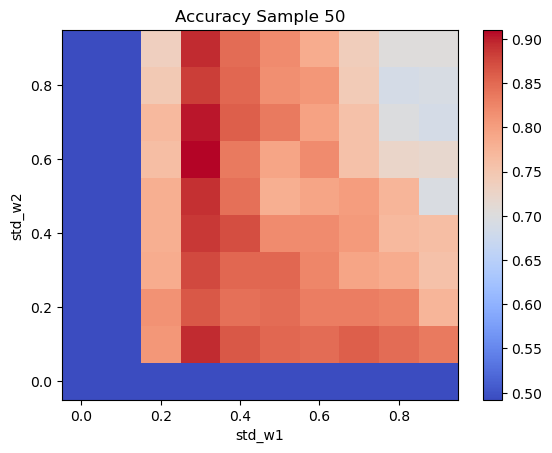

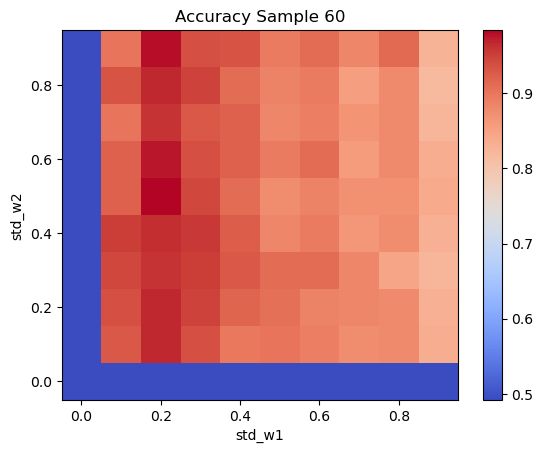

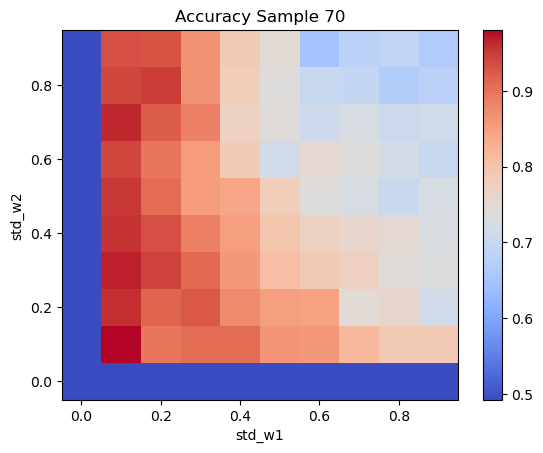

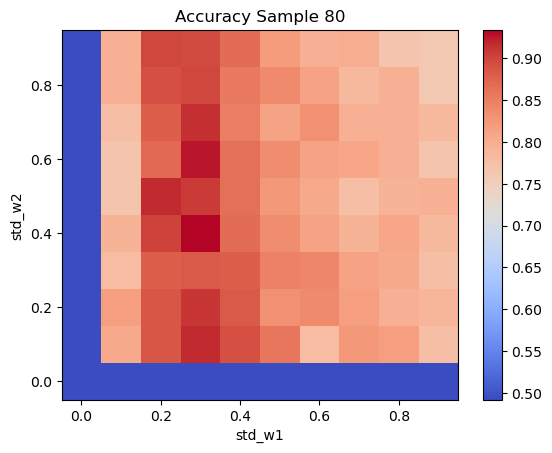

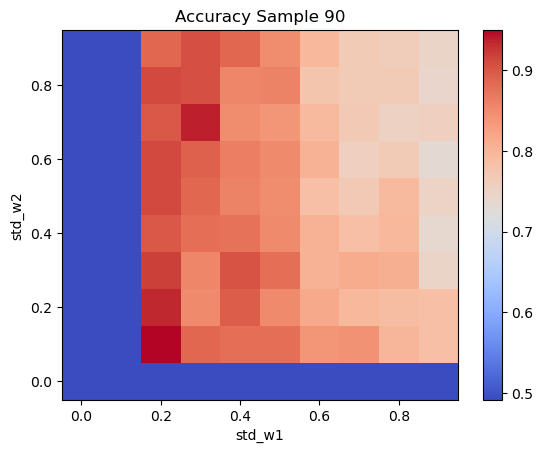

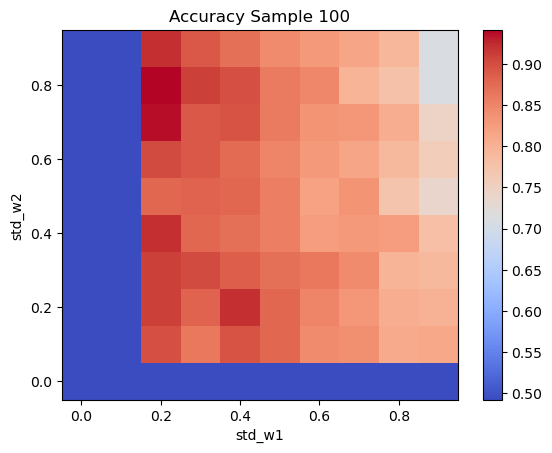

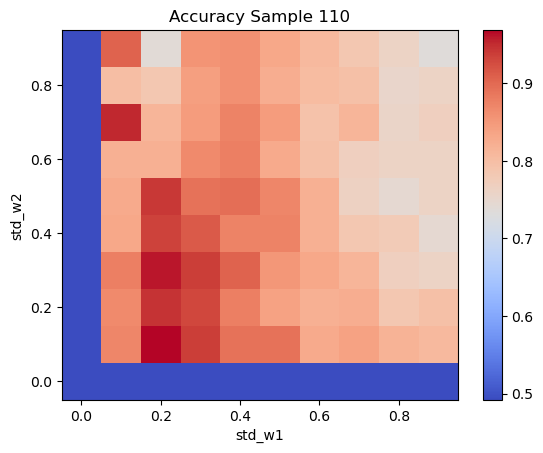

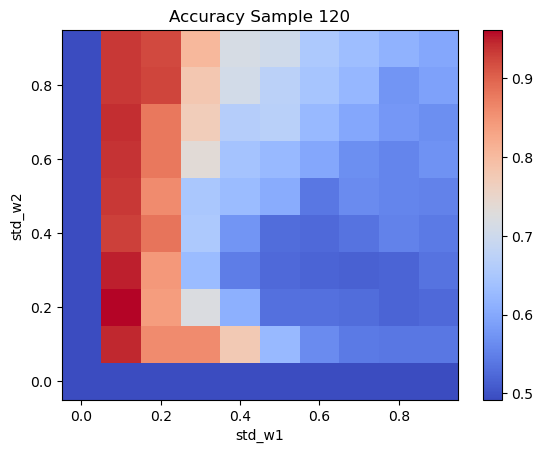

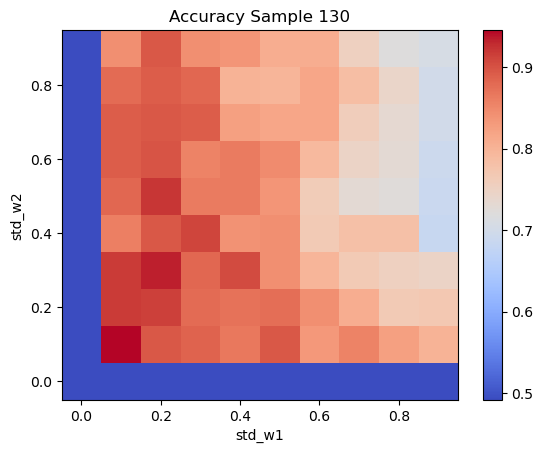

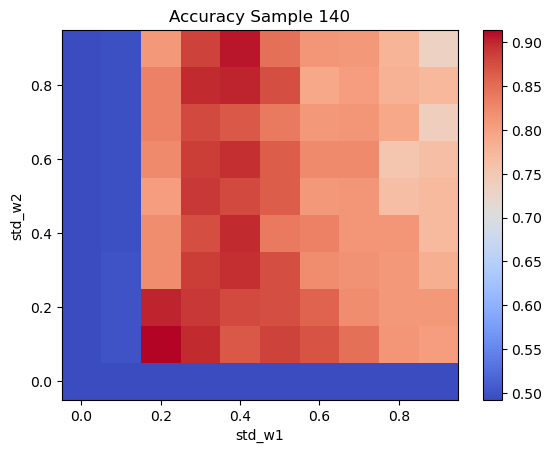

In [12]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [13]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [14]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.7453125 , 0.74375   , 0.74179688, 0.7296875 ,
        0.72617188, 0.72539062, 0.74023438, 0.72578125, 0.72890625],
       [0.4921875 , 0.9046875 , 0.90273437, 0.89570313, 0.89335937,
        0.890625  , 0.87421875, 0.87851563, 0.88398438, 0.87148437],
       [0.4921875 , 0.89882812, 0.88046875, 0.87148437, 0.87734375,
        0.86601562, 0.87539062, 0.88476562, 0.88203125, 0.87773437],
       [0.4921875 , 0.8734375 , 0.85742188, 0.85625   , 0.84492188,
        0.84648437, 0.8421875 , 0.8375    , 0.8421875 , 0.85078125],
       [0.4921875 , 0.85273438, 0.82890625, 0.82617188, 0.81289062,
        0.8140625 , 0.81054688, 0.81445312, 0.81679687, 0.81640625],
       [0.4921875 , 0.815625  , 0.81289062, 0.80039063, 0.78671875,
        0.77578125, 0.79375   , 0.79023438, 0.78984375, 0.78476563],
       [0.4921875 , 0.81445312, 0.7886718

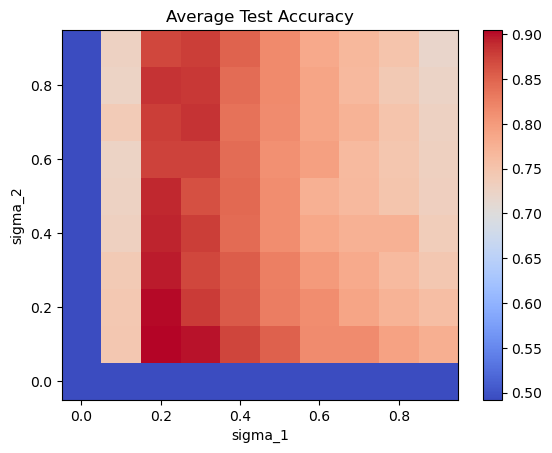

In [15]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_accuracy_grid_150_0.1.png".format(sample))

In [16]:
average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [17]:
test1 = average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_accuracy_grid_10_by_10_10_samples>0.88046874)

print(test2)


[0.86601562 0.87148437 0.87148437 0.8734375  0.87421875 0.87539062
 0.87734375 0.87773437 0.87851563 0.88046875 0.88203125 0.88398438
 0.88476562 0.890625   0.89335937 0.89570313 0.89882812 0.90273437
 0.9046875 ]


In [18]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.1
    array.append(tbw1_w2)

In [19]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 150
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("accuracy_150_seed_{}.npz".format(i),**data)
    i+=1

In [20]:
data = {}
data['frequency'] = 65
data['N'] = 150
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("accuracy_150",**data)